In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

there are no null values in the loaded dataset

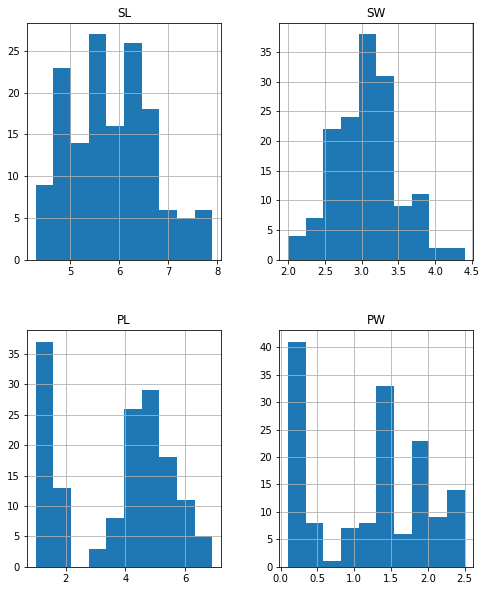

In [7]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,10))
plt.show()

# finding outliers

Text(0.5, 1.0, 'box plot of SL')

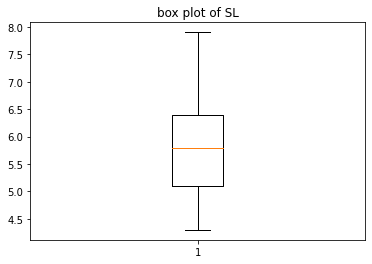

In [8]:
plt.boxplot(df['SL'])
plt.title('box plot of SL')

Text(0.5, 1.0, 'box plot of SW')

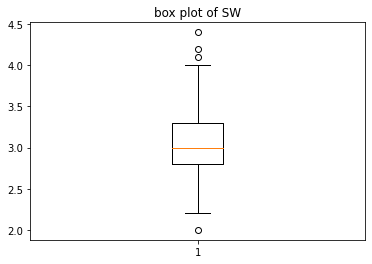

In [9]:
plt.boxplot(df['SW'])
plt.title('box plot of SW')

Text(0.5, 1.0, 'box plot of PL')

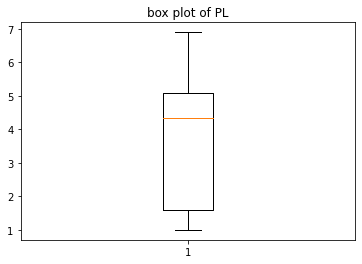

In [10]:
plt.boxplot(df['PL'])
plt.title('box plot of PL')

Text(0.5, 1.0, 'box plot of PW')

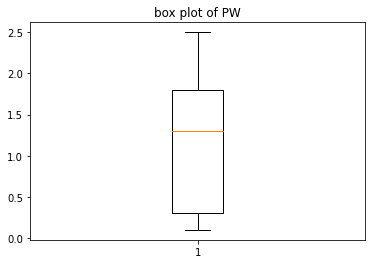

In [11]:
plt.boxplot(df['PW'])
plt.title('box plot of PW')

# Treating outliers of SW

In [12]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [13]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [14]:
IQR=Q3-Q1

In [15]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.05
4.05


In [16]:
outlier=[]
for x in df['SW']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)

In [17]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [18]:
ind1=df['SW']>upp_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [19]:
df.drop([15, 32, 33],inplace=True)

Text(0.5, 1.0, 'box plot of SW')

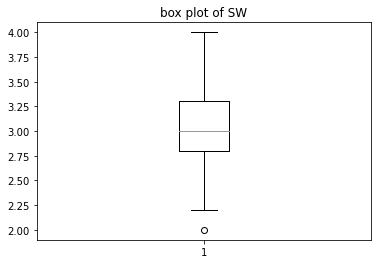

In [20]:
plt.boxplot(df['SW'])
plt.title('box plot of SW')

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Classification']= le.fit_transform(df['Classification'])
df


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

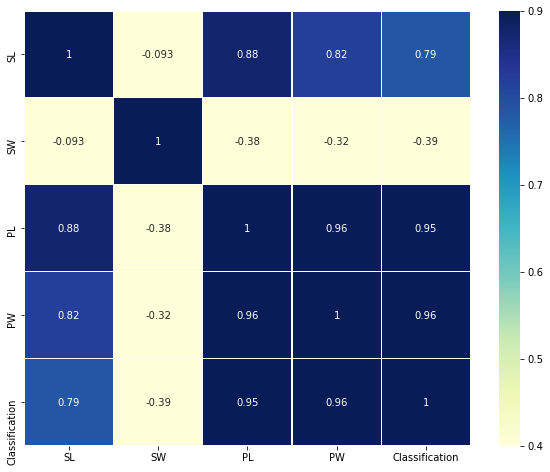

In [22]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [23]:
x = df.drop('Classification',axis=1)
y = df['Classification']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)

In [25]:
x_train.shape

(124, 4)

In [26]:
y_train.shape

(124,)

In [27]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.060393882659114974


In [29]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.9122297694322202


feature scaling

In [30]:
x.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367
std,0.834231,0.402971,1.751273,0.757973
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [31]:
type(x)

pandas.core.frame.DataFrame

In [32]:
from sklearn import preprocessing

In [33]:
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)

In [34]:
x=pd.DataFrame(x)

In [35]:
x.describe()

,0,1,2,3
count,1.470000e+02,1.470000e+02,1.470000e+02,1.470000e+02
mean,3.338694e-16,-4.418234e-16,1.593585e-16,-1.110223e-16
std,1.003419e+00,1.003419e+00,1.003419e+00,1.003419e+00
min,-1.865579e+00,-2.564584e+00,-1.607421e+00,-1.480515e+00
25%,-9.033329e-01,-5.725426e-01,-1.263642e+00,-1.215752e+00
50%,-6.136773e-02,-7.453218e-02,3.406611e-01,1.080668e-01
75%,6.603167e-01,6.724835e-01,7.417369e-01,7.699760e-01
max,2.464528e+00,2.415520e+00,1.773075e+00,1.696649e+00


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.060393882659115
R squared value is: 0.9122297694322202


the rsquared value is the same.standard scaling has no effect on the dataset

# min max scaling

In [37]:
x = df.drop('Classification',axis=1)
x.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367
std,0.834231,0.402971,1.751273,0.757973
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [38]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [39]:
x=min_max.fit_transform(x)

In [40]:
x=pd.DataFrame(x)

In [41]:
x.describe()

,0,1,2,3
count,147.000000,147.000000,147.000000,147.000000
mean,0.430839,0.514966,0.475499,0.465986
std,0.231731,0.201485,0.296826,0.315822
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.400000,0.101695,0.083333
50%,0.416667,0.500000,0.576271,0.500000
75%,0.583333,0.650000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.060393882659114995
R squared value is: 0.9122297694322202


again the rquared value is the same.i.e min max scaling also not affected the dataset

In [43]:
#normalization

In [44]:
x = df.drop('Classification',axis=1)
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,147.000000,147.000000,147.000000,147.000000
mean,0.751190,0.400825,0.460007,0.143179
std,0.044965,0.102384,0.157349,0.077319
min,0.653877,0.238392,0.167836,0.016695
25%,0.715082,0.326247,0.255940,0.051129
50%,0.753849,0.354140,0.536555,0.164742
75%,0.788911,0.519614,0.581476,0.197966
max,0.860939,0.607125,0.636981,0.280419


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.06299395346144786
R squared value is: 0.9084510951068518


by using normalization the the rsquared value decreased,which says that this model is not good for the data.

In [46]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [48]:
#lr
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print('Classification report',classification_report(y_test,y_pred))

Confusion matrix [[9 0 0]
 [0 4 3]
 [0 0 7]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.57      0.73         7
           2       0.70      1.00      0.82         7

    accuracy                           0.87        23
   macro avg       0.90      0.86      0.85        23
weighted avg       0.91      0.87      0.86        23



In [50]:
#svs
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [51]:
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print('Classification report',classification_report(y_test,y_pred))

Confusion matrix [[9 0 0]
 [0 4 3]
 [0 0 7]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.57      0.73         7
           2       0.70      1.00      0.82         7

    accuracy                           0.87        23
   macro avg       0.90      0.86      0.85        23
weighted avg       0.91      0.87      0.86        23



In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [53]:
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print('Classification report',classification_report(y_test,y_pred))

Confusion matrix [[9 0 0]
 [0 6 1]
 [0 1 6]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.86      0.86         7
           2       0.86      0.86      0.86         7

    accuracy                           0.91        23
   macro avg       0.90      0.90      0.90        23
weighted avg       0.91      0.91      0.91        23



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [55]:
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print('Classification report',classification_report(y_test,y_pred))

Confusion matrix [[9 0 0]
 [0 6 1]
 [0 1 6]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      0.86      0.86         7
           2       0.86      0.86      0.86         7

    accuracy                           0.91        23
   macro avg       0.90      0.90      0.90        23
weighted avg       0.91      0.91      0.91        23



random forest and svm gave highest accurecy.